<a href="https://colab.research.google.com/github/Gayathri0908/VIDEO_GAME_ANALYSIS_DATA_ANALYSIS/blob/main/Video_Game_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import Modules & Load Data
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/m-narayanan22/datasets/refs/heads/main/vgsales.csv")

# Handle missing values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Publisher'] = df['Publisher'].fillna("Unknown")

# Drop rows without Year & convert to int
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# Ensure sales columns are numeric
sales_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for col in sales_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 📊 Task 1: Yearly Sales Trend

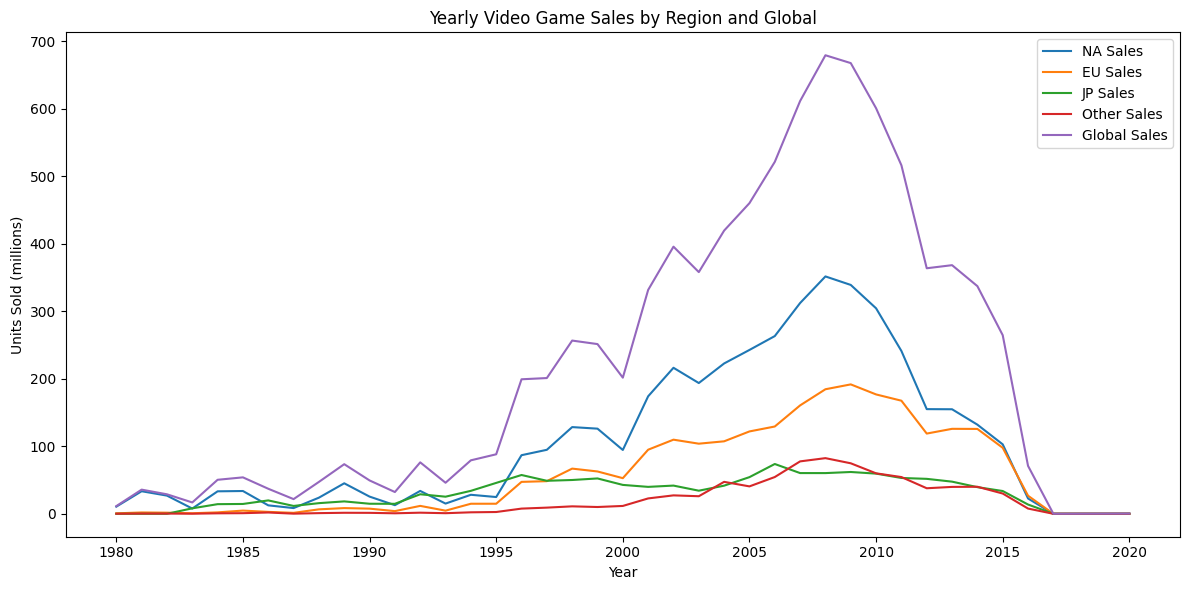

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,10.59,0.67,0.00,0.12,11.38
1,1981,33.40,1.96,0.00,0.32,35.77
2,1982,26.92,1.65,0.00,0.31,28.86
3,1983,7.76,0.80,8.10,0.14,16.79
4,1984,33.28,2.10,14.27,0.70,50.36


In [ ]:
yearly_sales = (df.groupby('Year')[sales_cols].sum().reset_index().sort_values('Year'))

# Plot yearly sales
plt.figure(figsize=(12,6))
for col in sales_cols:
    plt.plot(yearly_sales['Year'], yearly_sales[col], label=col.replace("_"," "))
plt.xlabel("Year")
plt.ylabel("Units Sold (millions)")
plt.title("Yearly Video Game Sales by Region and Global")
plt.legend()
plt.tight_layout()
plt.show()

yearly_sales.head()

In [5]:
# Q1: In which year were the most games sold globally and how many?

yearly_sales = df.groupby("Year")["Global_Sales"].sum()
max_year = yearly_sales.idxmax()
max_sales = yearly_sales.max()
print(f"Q1: Most games sold in {max_year} with {max_sales:.2f} million units.")


Q1: Most games sold in 2008 with 678.90 million units.


## 🎮 Task 2: Genres

In [ ]:
# TOP 10 GENRES:
genre_sales = df.groupby('Genre')[sales_cols].sum().reset_index()
genre_sales = genre_sales[genre_sales['Global_Sales'] >= 100].sort_values('Global_Sales', ascending=False)

top_genres = genre_sales.head(10)
top_genres

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,861.80,516.48,158.66,184.92,1722.88
10,Sports,670.09,371.34,134.76,132.65,1309.24
8,Shooter,575.16,310.45,38.18,101.90,1026.20
7,Role-Playing,326.50,187.58,350.29,59.38,923.84
4,Platform,445.99,200.67,130.65,51.51,829.15
3,Misc,402.48,213.82,106.67,74.02,797.62
6,Racing,356.93,236.32,56.61,76.68,726.77
2,Fighting,220.74,100.00,87.15,36.19,444.05
9,Simulation,181.78,113.20,63.54,31.36,390.16
5,Puzzle,122.01,50.53,56.68,12.47,242.22


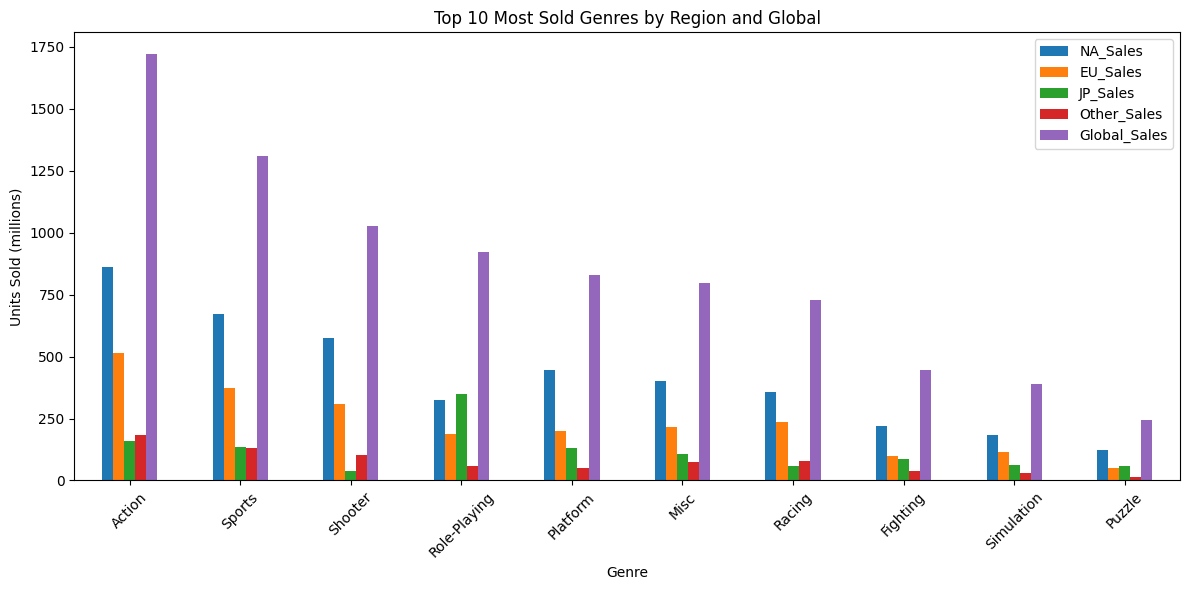

In [ ]:
top_genres.set_index('Genre')[sales_cols].plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Most Sold Genres by Region and Global")
plt.ylabel("Units Sold (millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Q2: What genre of video game is most popular in Japan and how many units?

jp_genre_sales = df.groupby("Genre")["JP_Sales"].sum()
top_jp_genre = jp_genre_sales.idxmax()
top_jp_sales = jp_genre_sales.max()
print(f"Q2: Most popular genre in Japan is '{top_jp_genre}' with {top_jp_sales:.2f} million units sold.")

Q2: Most popular genre in Japan is 'Role-Playing' with 350.29 million units sold.


In [7]:
# Q3: Which genre sold the most globally and how much?

global_genre_sales = df.groupby("Genre")["Global_Sales"].sum()
top_global_genre = global_genre_sales.idxmax()
top_global_sales = global_genre_sales.max()
print(f"Q3: Globally, the top genre is '{top_global_genre}' with {top_global_sales:.2f} million units sold.")

Q3: Globally, the top genre is 'Action' with 1722.88 million units sold.


## 🏢 Task 3: Publishers

In [ ]:
# TOP 10 PUBLISHERS:
publisher_sales = df.groupby('Publisher')[sales_cols].sum().reset_index()
publisher_sales = publisher_sales[publisher_sales['Global_Sales'] >= 100].sort_values('Global_Sales', ascending=False)

top_publishers = publisher_sales.head(10)
top_publishers

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,815.75,418.30,454.99,95.19,1784.43
138,Electronic Arts,584.22,367.38,13.98,127.63,1093.39
21,Activision,426.01,213.72,6.54,74.79,721.41
455,Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
524,Ubisoft,252.81,163.03,7.33,50.16,473.54
493,Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
487,THQ,208.60,94.60,5.01,32.11,340.44
275,Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
445,Sega,108.78,81.41,56.19,24.30,270.70
347,Namco Bandai Games,69.38,42.61,126.84,14.64,253.65


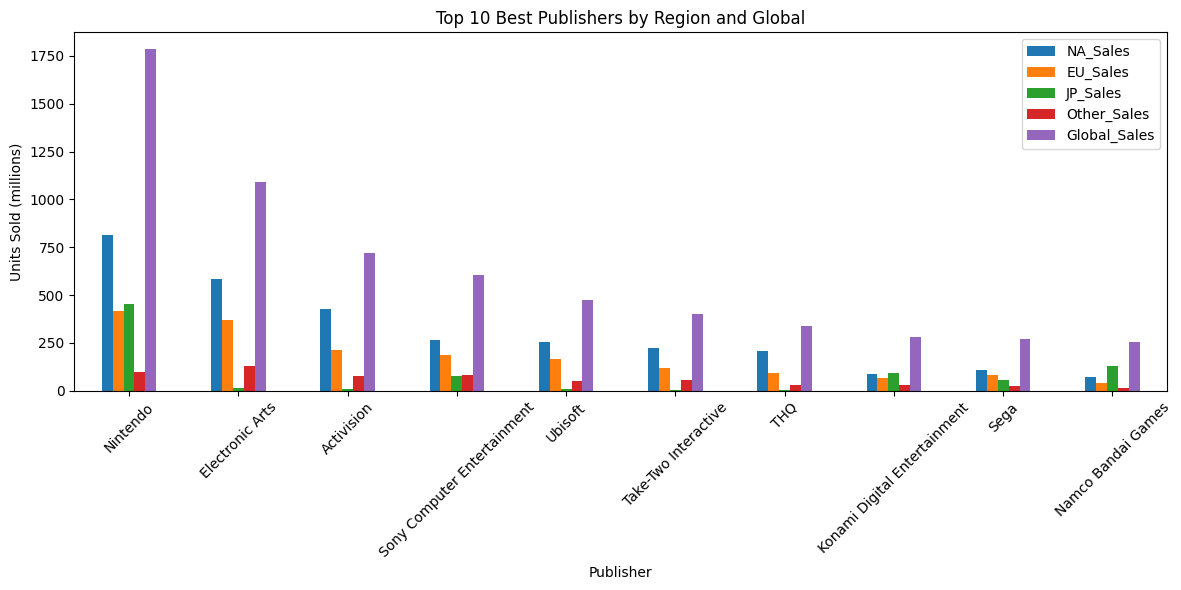

In [ ]:
top_publishers.set_index('Publisher')[sales_cols].plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Best Publishers by Region and Global")
plt.ylabel("Units Sold (millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Q4: Which publisher sold the most globally and how much?

publisher_sales = df.groupby("Publisher")["Global_Sales"].sum()
top_publisher = publisher_sales.idxmax()
top_publisher_sales = publisher_sales.max()
print(f"Q4: Top publisher globally is '{top_publisher}' with {top_publisher_sales:.2f} million units sold.")


Q4: Top publisher globally is 'Nintendo' with 1784.43 million units sold.


## 🎮 Task 4: Platforms

In [ ]:
#TOP 10 PLATFORMS
platform_sales = df.groupby('Platform')[sales_cols].sum().reset_index()
platform_sales = platform_sales[platform_sales['Global_Sales'] >= 100].sort_values('Global_Sales', ascending=False)

top_platforms = platform_sales.head(10)
top_platforms

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS2,572.92,332.63,137.54,190.47,1233.46
28,X360,594.33,278.01,12.30,84.67,969.61
17,PS3,388.90,340.47,79.21,140.81,949.35
26,Wii,497.37,264.35,68.28,79.20,909.81
4,DS,388.56,194.07,175.02,60.29,818.96
15,PS,334.71,212.38,139.78,40.69,727.39
6,GBA,184.12,74.59,46.56,7.61,313.56
19,PSP,107.09,67.16,75.89,41.52,291.71
18,PS4,96.80,123.70,14.30,43.36,278.10
13,PC,92.10,137.64,0.17,24.33,255.05


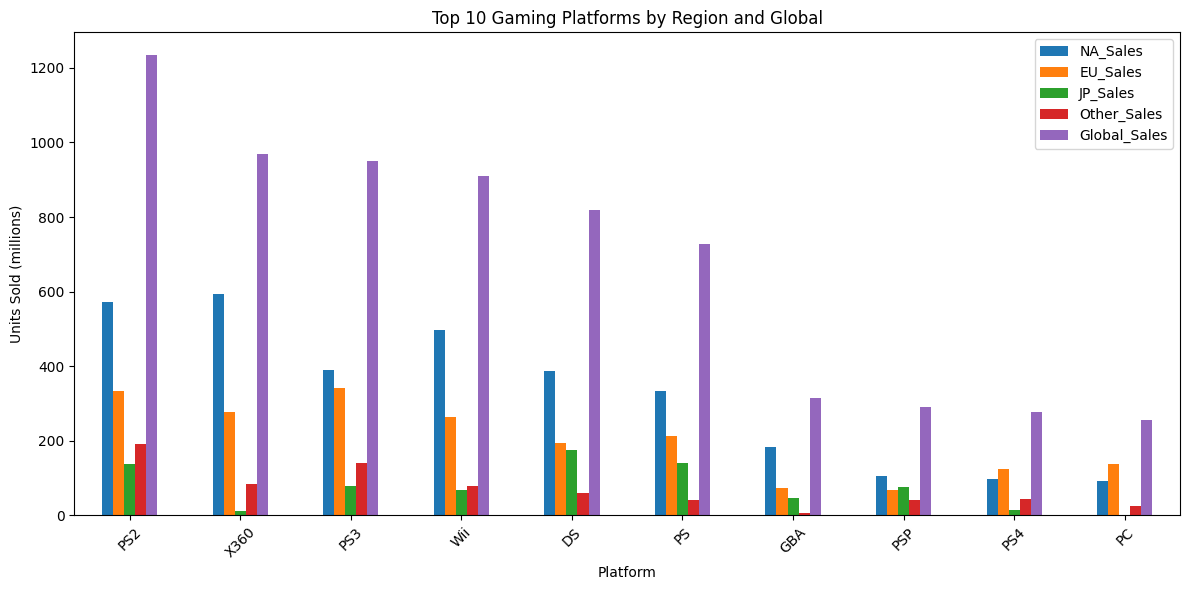

In [ ]:
top_platforms.set_index('Platform')[sales_cols].plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Gaming Platforms by Region and Global")
plt.ylabel("Units Sold (millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Q5: Which platform sold the most globally and how much?

platform_sales = df.groupby("Platform")["Global_Sales"].sum()
top_platform = platform_sales.idxmax()
top_platform_sales = platform_sales.max()
print(f"Q5: Top platform globally is '{top_platform}' with {top_platform_sales:.2f} million units sold.")

Q5: Top platform globally is 'PS2' with 1233.46 million units sold.
